<a href="https://colab.research.google.com/github/mvdj/mvdj.github.io/blob/master/QualidadeVinho_%C3%81rvoreDeDecis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Qualidade Vinho - Classificação com Árvores de Decisão**

Dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality) com 8096 instâncias de dados sobre a qualidade dos vinhos (Red and White). Dados descrevem componentes químicos/biológicos que fazem parte da qualidade de um vinho.

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# **1. Importação das bibliotecas**


In [ ]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# **2. Lendo dados**


In [ ]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataSets/QualidadeVinho/winequality-whiteAndRed.csv')

In [ ]:
# verificando o dataframe
dados.head(5)

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1001.0000,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.0000,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#verificando colunas dos dados
dados.columns

Index(['wine type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
#verificar a quantidade de instâncias
dados.shape

(8096, 13)

# **3. Limpeza e organização dos dados**

In [ ]:
#verificar e eliminar se existem valores NAN, ? e/ou faltantes
dados = dados.dropna()

In [ ]:
#eliminar colunas irrelevantes para o contexto
dados = dados.drop(columns=['density']) # atributo com valores desproporcional

In [ ]:
#verificar quantidade de instâncias sem valores NAN, ? e/ou faltantes
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


In [ ]:
#trocando o tipo do atributo 'wine type'  por um tipo numerico
dados['wine type'] = dados['wine type'].replace(['white','red'],[0,1]) # 0 - para white wine | 1 - para red wine
dados.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,49.00,14.0,132.0,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.05,30.0,97.0,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,58.00,47.0,186.0,3.19,0.40,9.9,6


# **4. Re-escala dos dados**

**Re-escala usando máximo e mínimo**

In [ ]:
dados = (dados - dados.min())/(dados.max()-dados.min())

# **5. Organizando dados para modelagem**

**Dividir os dados em atributos descritores e atributo de classe (target)**

In [ ]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.264463,0.000160,0.216867,0.308282,0.073619,0.152778,0.377880,0.217054,0.129213,0.115942,0.5
1,0.206612,0.000186,0.204819,0.015337,0.080166,0.045139,0.290323,0.449612,0.151685,0.217391,0.5
2,0.355372,0.000169,0.240964,0.096626,0.000049,0.100694,0.209677,0.418605,0.123596,0.304348,0.5
3,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5
4,0.280992,0.000127,0.192771,0.121166,0.094897,0.159722,0.414747,0.364341,0.101124,0.275362,0.5


In [ ]:
y = dados['wine type']
y.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: wine type, dtype: float64

**Dividir os dados em treino e teste**



In [ ]:
from sklearn.model_selection import train_test_split

Divide a matriz em subconjuntos aleatórios de treino e teste
test_size: tamanho do subconjunto de teste (em percentual)
random_state: define a semente para a aleatoriedade (se não definido, semente aleatória)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)#random_state=42

In [ ]:
X_train.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
4327,0.214876,0.000135,0.156627,0.116564,0.088350,0.159722,0.405530,0.310078,0.157303,0.217391,0.333333
3841,0.231405,0.000110,0.301205,0.124233,0.058889,0.138889,0.426267,0.186047,0.191011,0.434783,0.500000
6681,0.239669,0.000456,0.126506,0.019939,0.129268,0.024306,0.129032,0.620155,0.202247,0.188406,0.500000
270,0.256198,0.000203,0.156627,0.118098,0.086713,0.107639,0.400922,0.410853,0.162921,0.173913,0.500000
5373,0.479339,0.000506,0.144578,0.024540,0.142361,0.013889,0.050691,0.325581,0.213483,0.318841,0.333333


In [ ]:
X_train.shape

(5667, 11)

In [ ]:
X_test.shape

(2429, 11)

In [ ]:
y_train.head()

2587    0.0
3041    0.0
4266    0.0
2795    0.0
6696    1.0
Name: wine type, dtype: float64

**Comentários**

*Basicamente foi realizada a divisão/particionamento dos dados em treino (70%) e teste (30%).*

# **5. Definindo algoritmo de aprendizado**

* Árvore de decisão
 * criterion: medida de qualidade das separações ('gini','entropia')
   * gini: impureza de Gini
   * entropy: ganho de informação
 * max_depth: profundidade máxima da árvore

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#definindo modelo
MeuModelo = DecisionTreeClassifier(criterion='entropy')

In [ ]:
#treinando modelo
MeuModelo.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
2587,0.107438,0.000051,0.150602,0.001534,0.063799,0.048611,0.191244,0.387597,0.117978,0.173913,0.500000
3041,0.198347,0.000211,0.246988,0.248466,0.060526,0.197917,0.384793,0.410853,0.196629,0.202899,0.500000
4266,0.181818,0.000194,0.162651,0.026074,0.068709,0.062500,0.262673,0.465116,0.106742,0.681159,0.666667
2795,0.214876,0.000118,0.192771,0.101227,0.045795,0.048611,0.177419,0.317829,0.185393,0.420290,0.833333
6696,0.256198,0.000852,0.036145,0.023006,0.099807,0.038194,0.057604,0.612403,0.117978,0.492754,0.166667
...,...,...,...,...,...,...,...,...,...,...,...
3141,0.173554,0.000211,0.192771,0.115031,0.062162,0.027778,0.064516,0.387597,0.078652,0.681159,0.666667
3279,0.297521,0.000068,0.192771,0.012270,0.106354,0.076389,0.308756,0.263566,0.140449,0.492754,0.500000
5439,0.471074,0.000321,0.295181,0.087423,0.104717,0.013889,0.025346,0.379845,0.286517,0.434783,0.500000
6167,0.140496,0.000346,0.018072,0.018405,0.071983,0.093750,0.186636,0.604651,0.337079,0.869565,0.833333


In [ ]:
y_train

2587    0.0
3041    0.0
4266    0.0
2795    0.0
6696    1.0
       ... 
3141    0.0
3279    0.0
5439    0.0
6167    0.0
1784    0.0
Name: wine type, Length: 5667, dtype: float64

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (100,80)

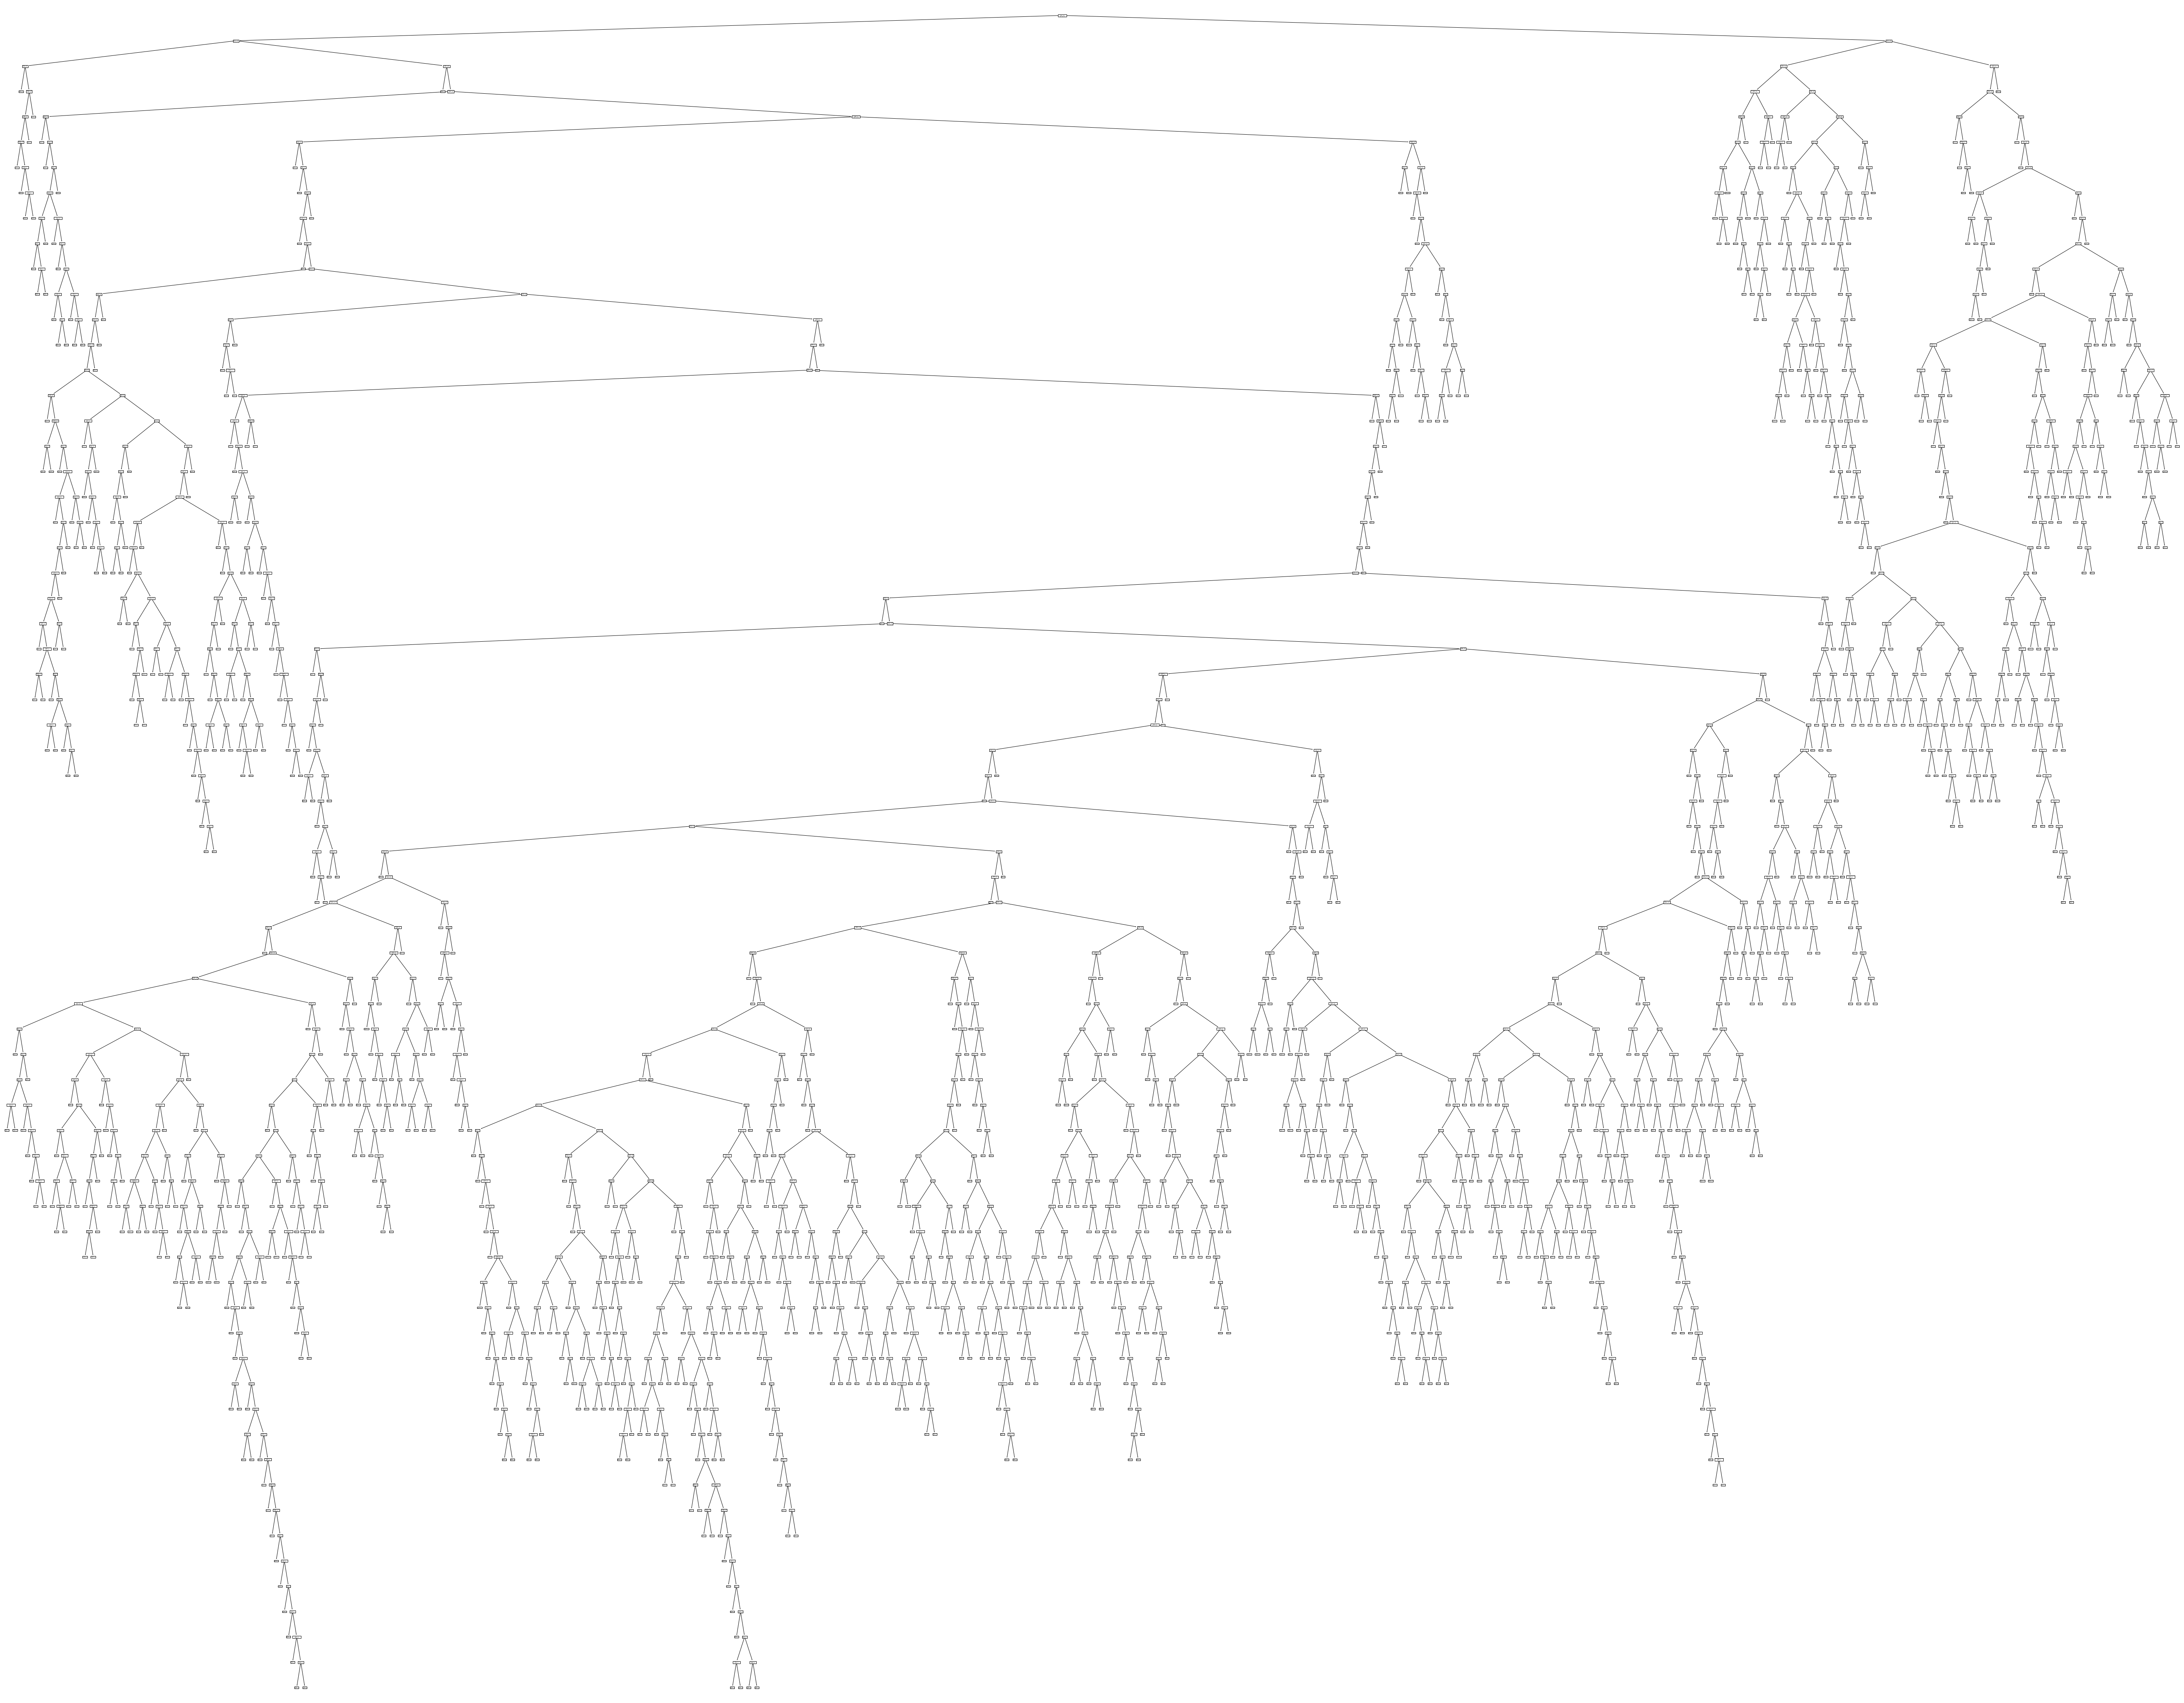

In [ ]:
plot_tree(MeuModelo,feature_names=dados.columns[1:])
plt.show()

In [ ]:
# mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (8,6)

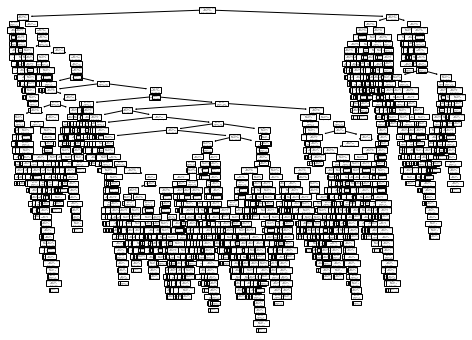

In [ ]:
plot_tree(MeuModelo,feature_names=dados.columns[1:])
plt.show()

In [ ]:
#realizando classificação
previsores = MeuModelo.predict(X_test)
previsores

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',previsores[i])

0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
1.0 	 1.0
0.0 	 1.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
1.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0


**Comentários**

*Neste tópico acima, no qual foi feita a definição do modelo do algoritmo de Árvore de decisão, foram testados os dois critérios: gini (padrão) e o entropy, porém em ambos as métricas (principalmente da acurácia) para o preditor foi muito aquém do ideal (abaixo de 70%), conforme será conferido no tópico seguinte. Professor, o que pode ter acontecido? O que seria possível fazer para melhorar essa performance?*

# **6. Avaliação do classificador**

* Precisamos de métricas para saber quão bem nosso modelo se comportou
* No dataset temos instâncias que são positivas (vinho tinto) e negativas (vinho branco)
* Ideal é que o classificador classifique como positivo o que é positivo e negativo o que é negativo
* No entanto erros ocorrem na classificação
* Possibilidades de classificação:
  * tp (positivo verdadeiro): *vinho tinto* classificado como *tinto* - acerto
  * tn (negativo verdadeiro): *vinho branco* classificado como *branco* - acerto
  * fp (positivo falso): *vinho branco* classificado como *tinto* - erro
  * fn (negativo falso): *vinho tinto* foi classificado como *branco* - erro
* Exemplo:
  * 1 para tinto, 0 para branco

<table>
  <tr><th>Real</th><th>Predito</th><th>Categoria</th></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>1</td><td>0</td><td>fn</td></tr>
  <tr><td>0</td><td>1</td><td>fp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>1</td><td>fp</td></tr>
  <tr><td>1</td><td>1</td><td>tp</td></tr>
  <tr><td>0</td><td>0</td><td>tn</td></tr>
</table>

* Resultado
  * acertos: $3 + 4 = 7$
  * erros: $1 + 2 = 3$
* Matriz de confusão

<table border="1">
    <tr>
        <th>Valores reais</th>
        <th colspan="2">Valores preditos</th>
    </tr>
    <tr>
        <td>Tinto</td>
        <td></td>
        <td>Branco</td>
    </tr>
    <tr>
        <td>Tinto</td>
        <td>3 (tp)</td>
        <td>1 (fn)</td>
    </tr>
    <tr>
        <td>Branco</td>
        <td>2 (fp)</td>
        <td>4 (tn)</td>
    </tr>
</table>

* Acurácia
  * taxa de acertos do classificador
  * indicação geral da performance do modelo
  * $acuracia = \dfrac{tp+tn}{tp+fp+tn+fn} = \dfrac{acertos}{total} = \dfrac{7}{10} = 0.7$
  * não é boa métrica quando dados muito desbalanceados
    * ex: fraudes no cartão de crédito

* Precisão
  * taxa de instâncias classificadas como positivas que são realmente positivas
  * $precision = \dfrac{tp}{tp+fp} = \dfrac{3}{5} = 0.6$
  * situações onde falsos positivos são mais prejudiciais
    * ex: classificar um investimento como boa oportunidade

* Recall
  * taxa de instâncias positivas classificadas corretamente
  * também chamaod de sentitividade ($sensitivity$)
  * $recall = \dfrac{tp}{tp+fn} = {3}{3+1} = 0.75$
  * situações onde falsos negativos são mais prejudiciais
    * ex: classificação de doenças

* F1-score
  * balanço entre precisão e recall (media harmônica)
  * forma de olhar apenas uma métrica ao invés de duas
  * $f$-$score = 2 * \dfrac{precision*recall}{precision+recall} = \dfrac{0.6 * 0.75}{0.6+0.75} = 0.67$
  * f1-score baixo indica que uma das duas métricas está baixa


In [ ]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(y_test,previsores)
acuracia

0.6722931247426924

In [ ]:
#calculando precisão
from sklearn.metrics import precision_score

In [ ]:
precisao = precision_score(y_test,previsores)
precisao

0.10319410319410319

In [ ]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(y_test,previsores)
recall

0.08879492600422834

In [ ]:
#calculando f1-score
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(y_test,previsores)
f1

0.09545454545454546

### Curva ROC
* Representação gráfica do desempenho de um classificador binário
* Razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR)
  * $tpr = \dfrac{tp}{tp+fn} = \dfrac{positivos\_verdadeiros}{positivos\_totais}$ 
    * (recall)
  * $fpr = \dfrac{fp}{tn+fp} = \dfrac{positivos\_falsos}{negativos\_totais}$
* Interpretação
  * quanto maior tpr, melhor
  * quanto menor fpr, melhor

<img src=https://upload.wikimedia.org/wikipedia/commons/3/36/ROC_space-2.png width=500>

In [ ]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [ ]:
fpr, tpr, _ = roc_curve(y_test,previsores)

In [ ]:
fpr

array([0.        , 0.18660532, 1.        ])

In [ ]:
tpr

array([0.        , 0.08879493, 1.        ])

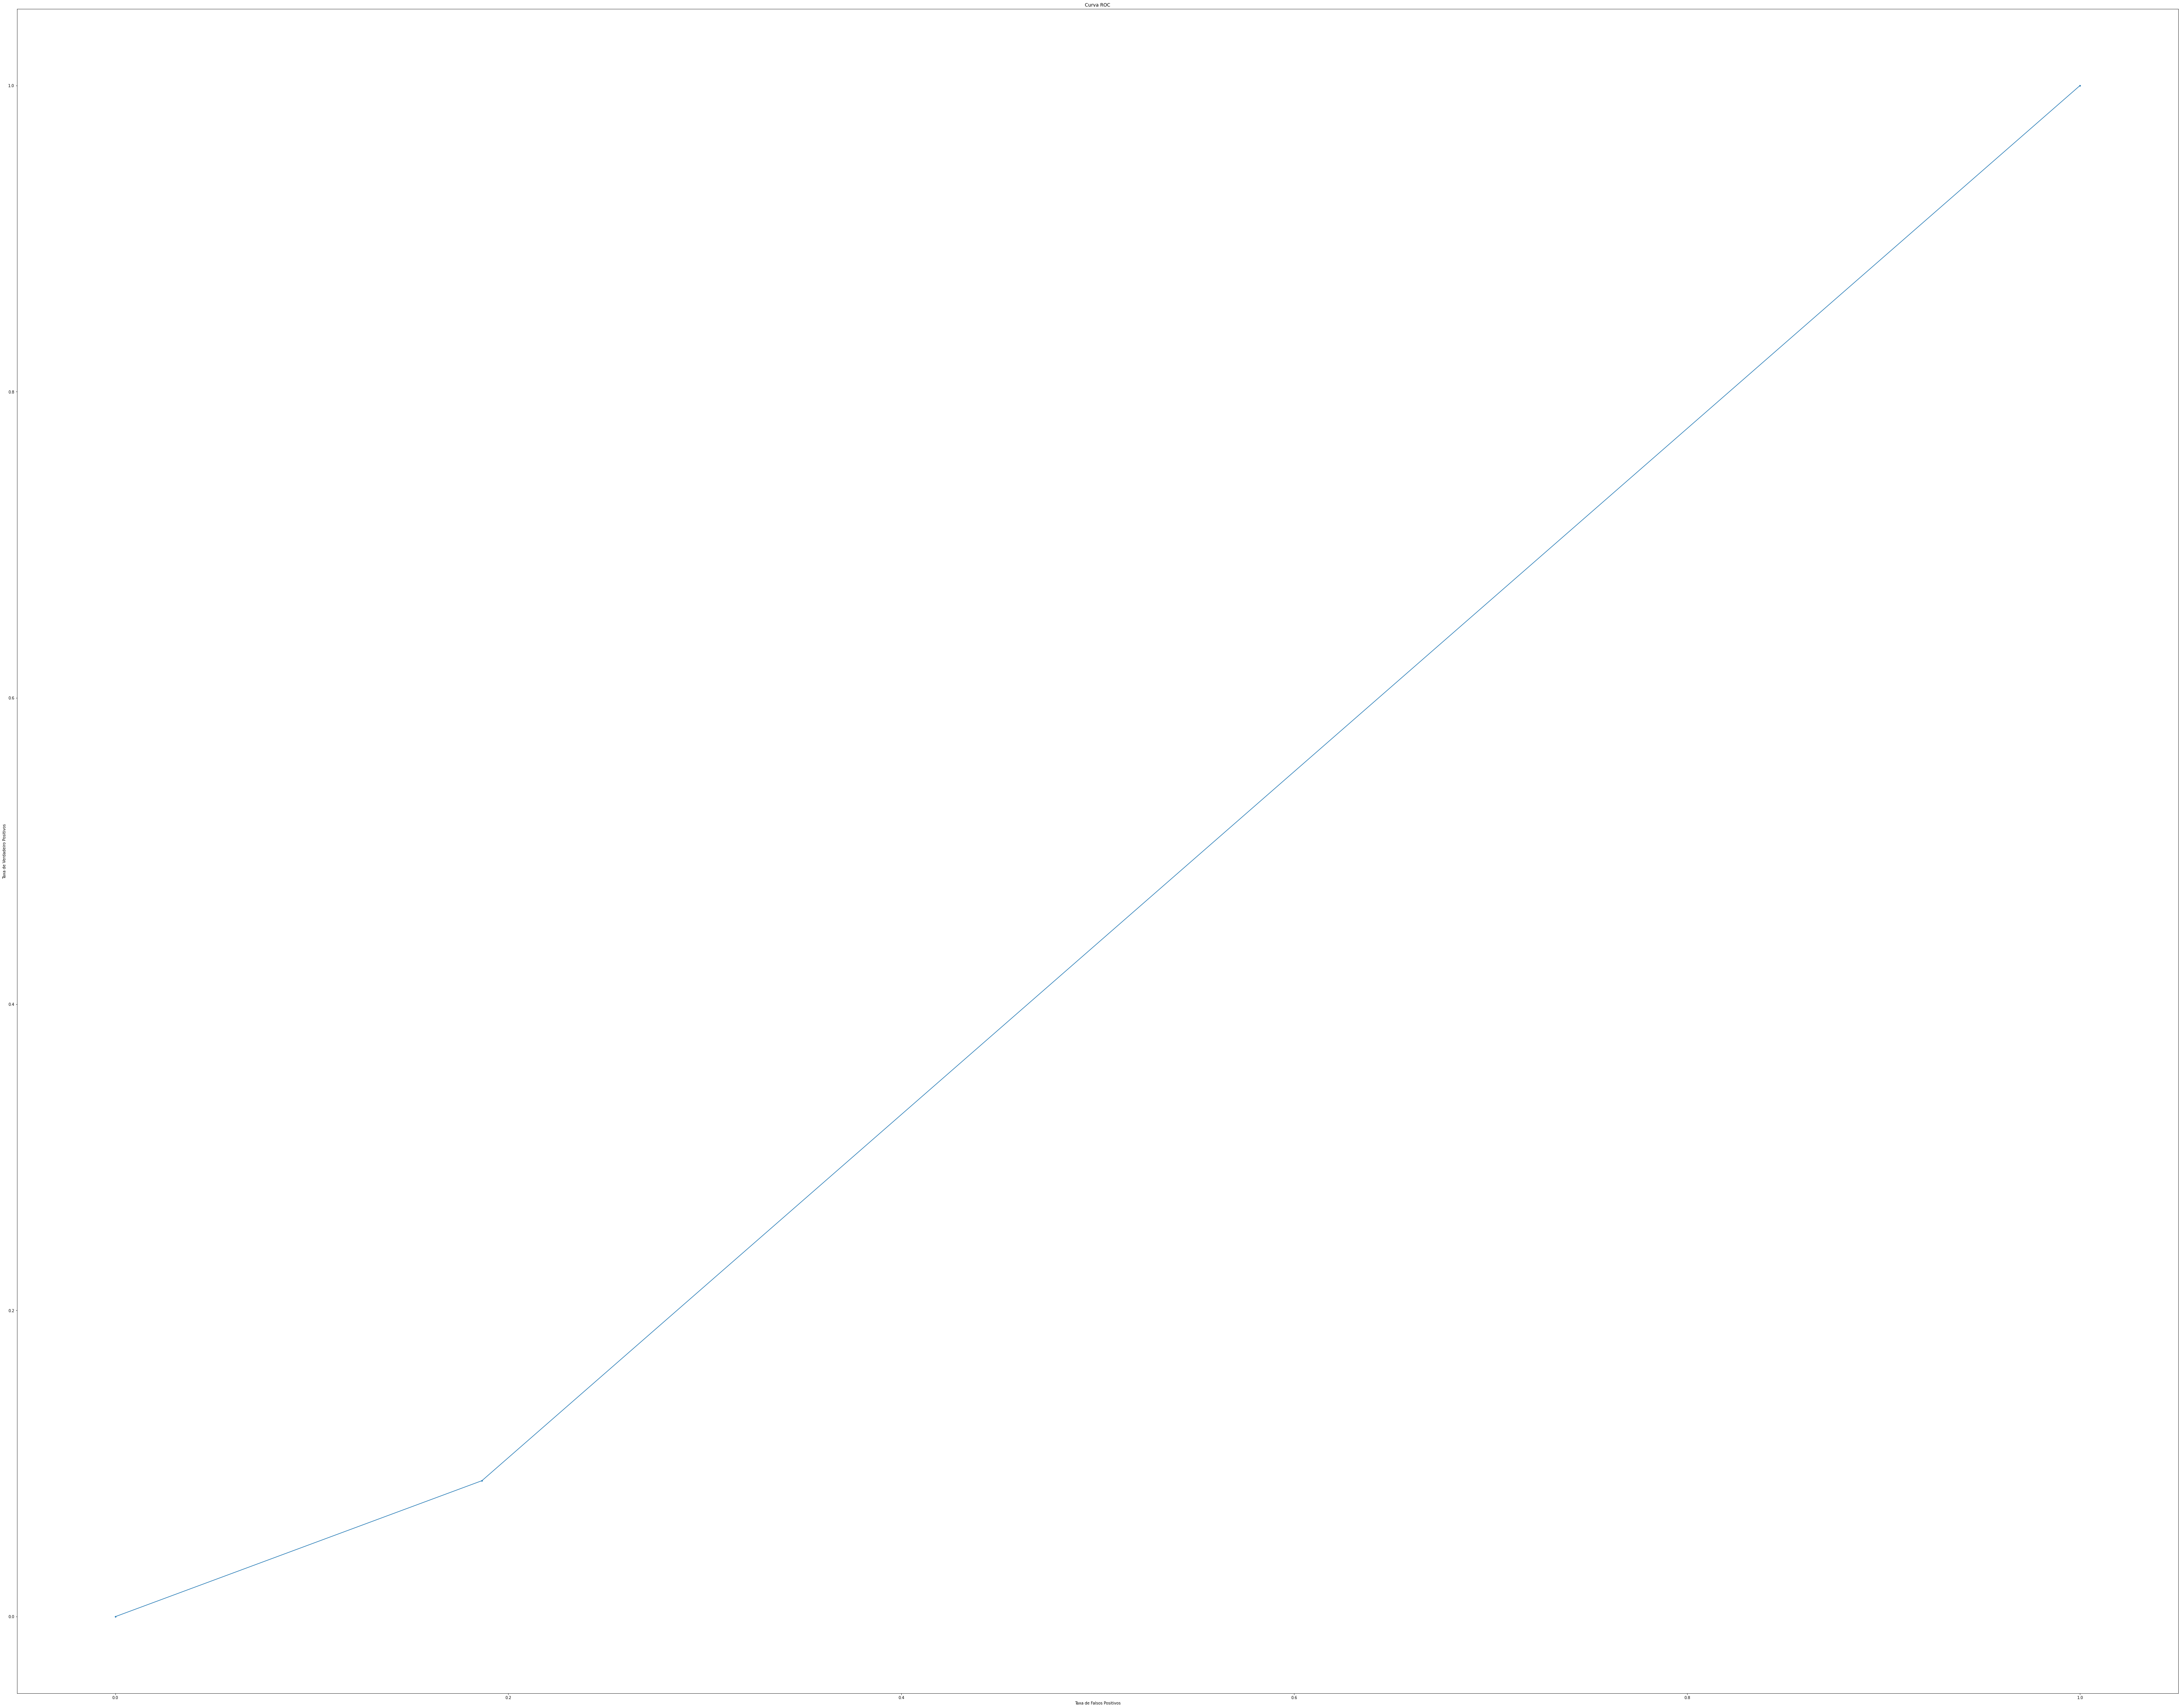

In [ ]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

**Área sob a curva (Area under the curve - AUC)**
* Área sob a curva ROC
* Interpretação numérica da curva ROC

In [ ]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [ ]:
erro = roc_auc_score(y_test,previsores)
erro

0.4510948045154067

## **Validação cruzada**
* A forma de avaliação anterior dividiu o dataset em dois subconjuntos disjuntos: treino e teste 
  * o treino foi usado para construir o modelo
  * o teste foi usado para avaliar o modelo
  * método holdout
* No entanto, devido a aleatoriedade, o resultado pode não ser tão confiável
* Validação cruzada k-fold
  * dividir o conjunto de dados em $k$ subconjuntos (folds) disjuntos
  * um subconjunto é usado para teste
  * os outros k-1 subconjuntos são usados para criar o modelo
  * repete-se o procedimento k vezes, alternando o subconjunto de teste
  * calcula-se a acurácia média das k repetições e tem-se a avaliação do método


<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width="500">

In [ ]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [1620 1621 1622 ... 8093 8094 8095] 
Teste: [   0    1    2 ... 1617 1618 1619]
-----
Treino: [   0    1    2 ... 8093 8094 8095] 
Teste: [1620 1621 1622 ... 3236 3237 3238]
-----
Treino: [   0    1    2 ... 8093 8094 8095] 
Teste: [3239 3240 3241 ... 4855 4856 4857]
-----
Treino: [   0    1    2 ... 8093 8094 8095] 
Teste: [4858 4859 4860 ... 6474 6475 6476]
-----
Treino: [   0    1    2 ... 6474 6475 6476] 
Teste: [6477 6478 6479 ... 8093 8094 8095]
-----


In [ ]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
#define modelo
classificador = DecisionTreeClassifier()

In [ ]:
#calculando os scores======> Por que aqui deu uma acurácia bem mais significativa...
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.80246914, 0.80246914, 0.80246914, 0.80246914, 0.80246914,
       0.80246914, 0.80346106, 0.4289246 , 0.        , 0.19901112])

In [ ]:
# acurácia e desvio padrão
scores.mean(),scores.std()

(0.6246211600970563, 0.2883324063852302)

**Comentários**

*Neste tópico acima, constata-se o que foi o que se antevia mostrado no tópico anterior, métricas (acurácia, recall entre outros) muito abaixo. A curva ROC também mostrou um comportamento fora do ideal. Quanto a validação cruzada observa-se que houve uma acurácia bem mais significativa (acima de 80%), porém em outros Folds teve 42%, 18% e até 0%. Professor a que se deve isso??*

# **7. Comparando Árvore de Decisão com Random Forest**

**Método Holdout**

In [ ]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,y_test)

0.6718814326883491

In [ ]:
#calculando acurácia da random forest  ==> PORQUE AQUI É TRAIN...NÃO SERIA (X_test, y_test)??? INCLUSIVE FOI FALADO TEST NA LIVE PRÁTICA
floresta.score(X_test,y_test)

0.6747632770687526

**Comentários**

*Professor no seu notebook o teste da FLORESTA foi utilizado X_TRAIN E y_TRAIN está incorreto ok? Seria ambos TEST, confere?*

In [ ]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)

In [ ]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [ ]:
#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

In [ ]:
#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

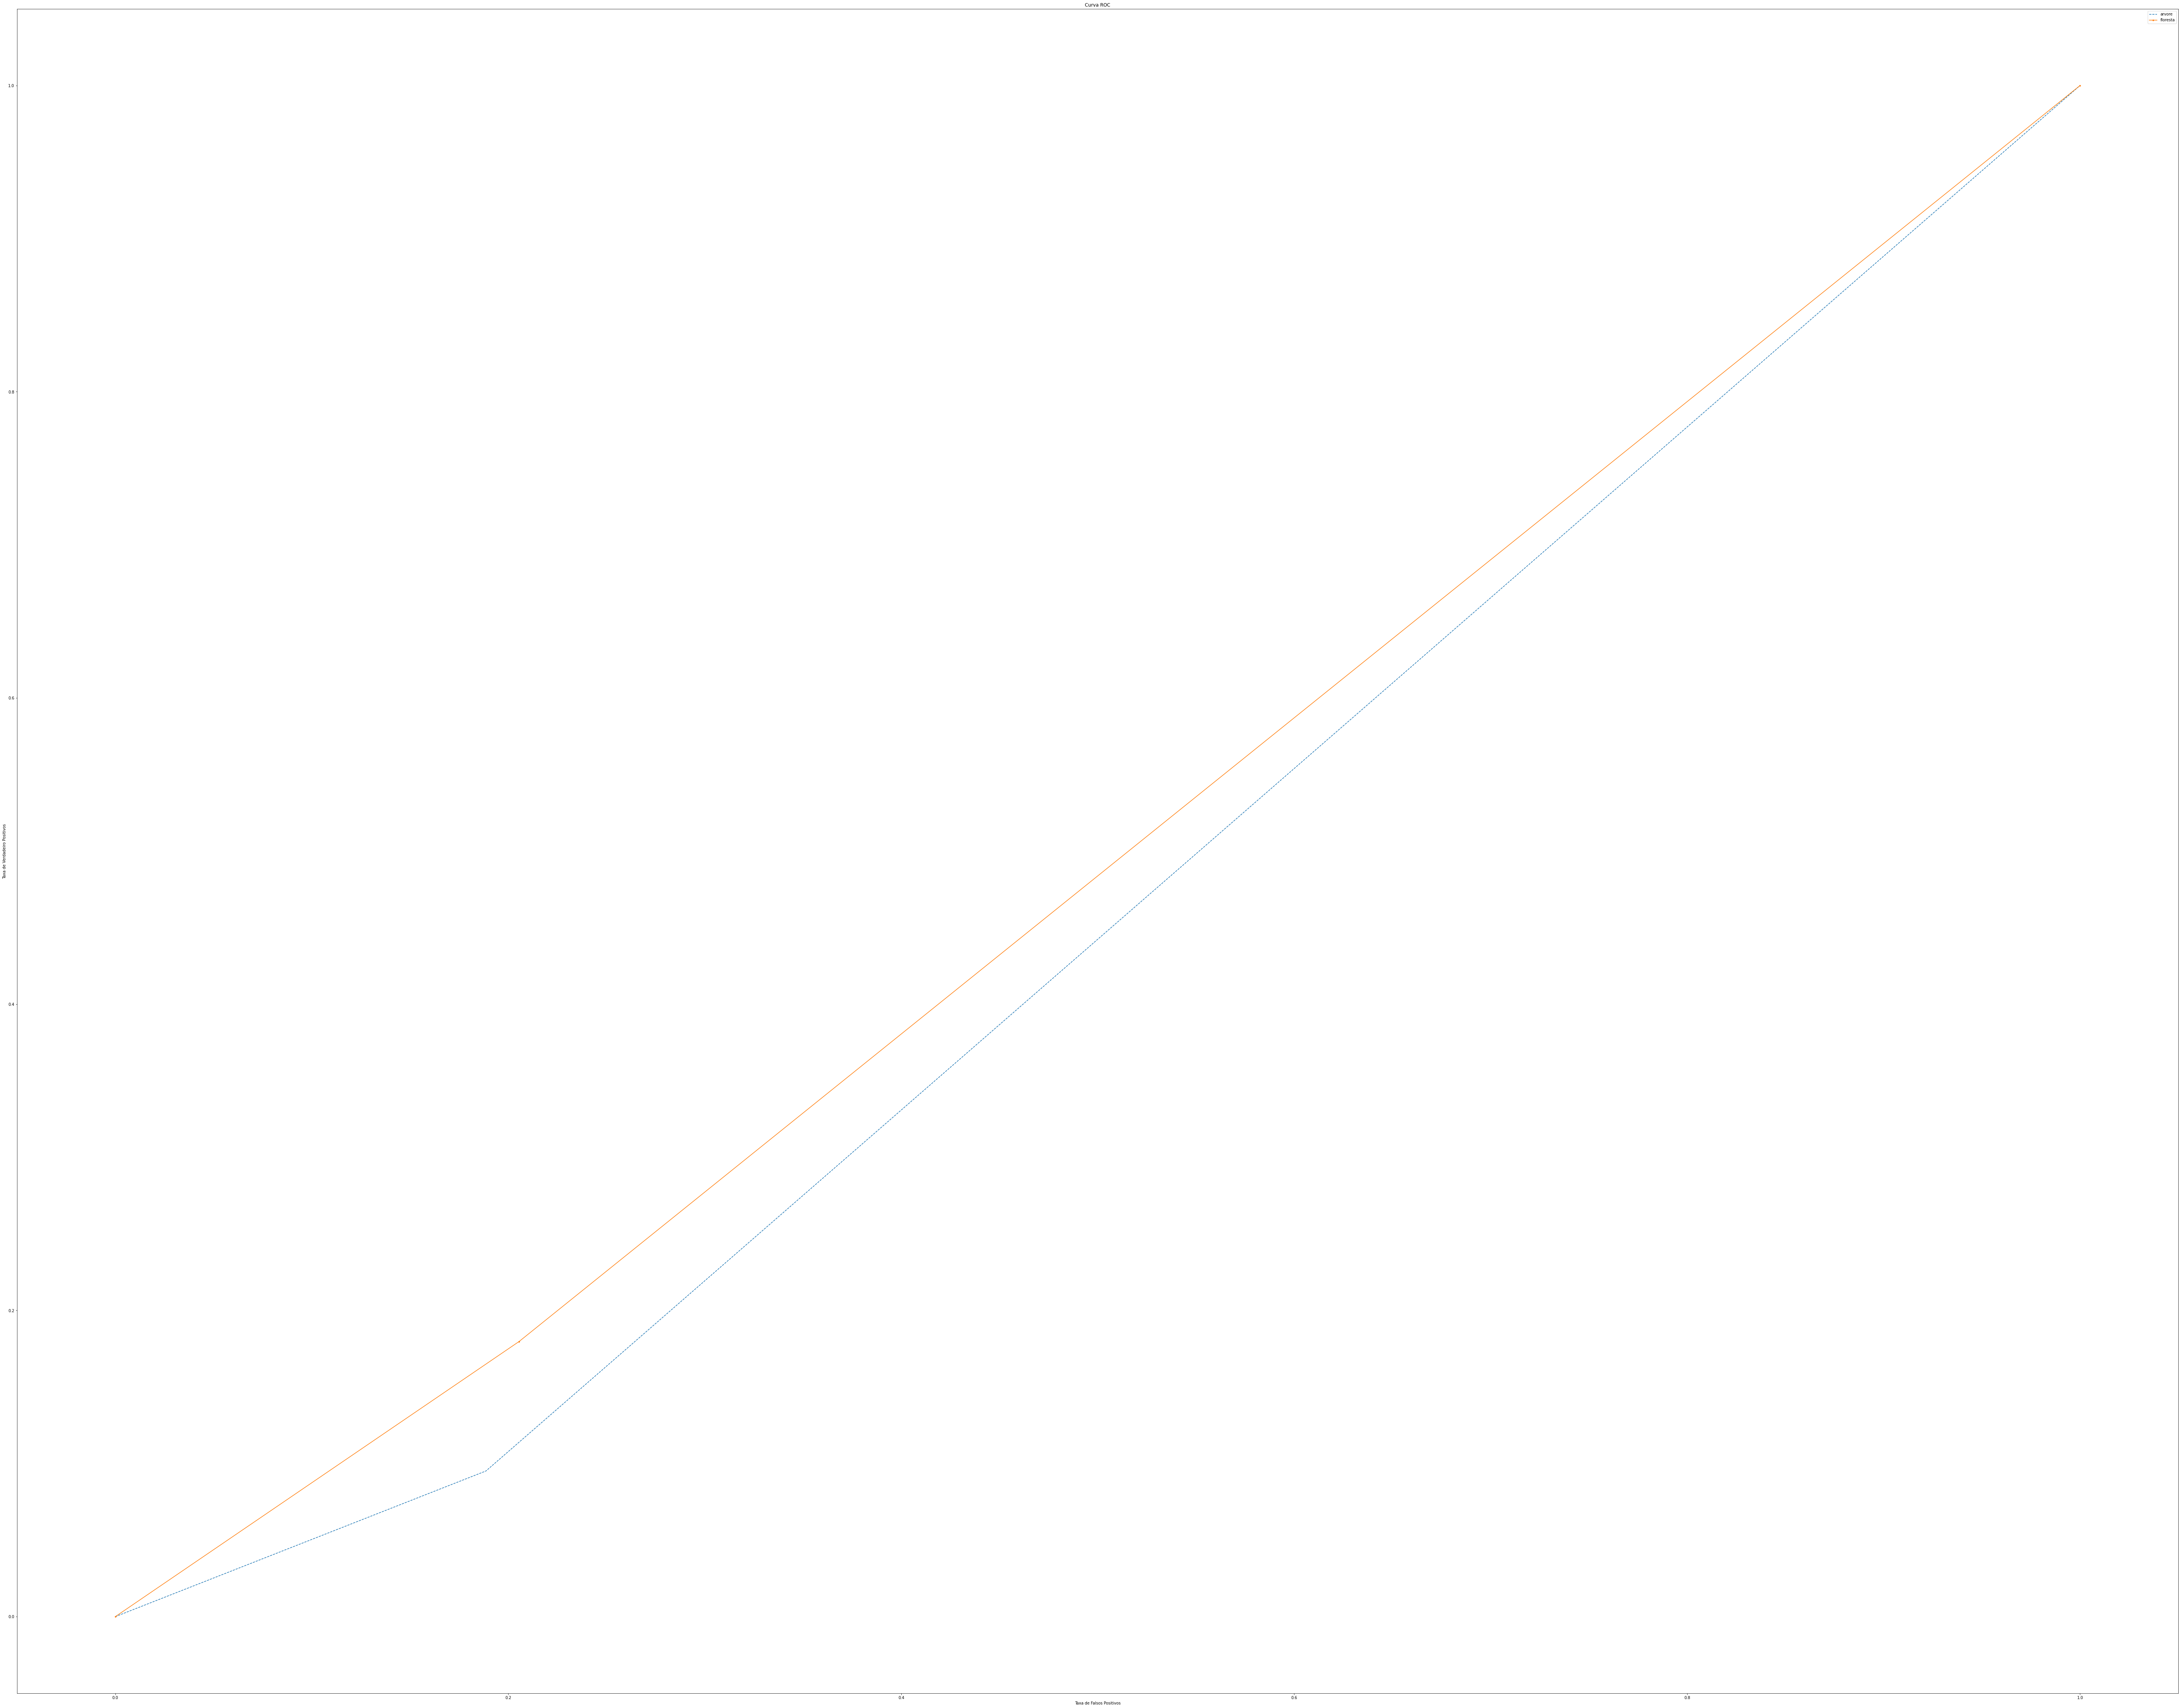

In [ ]:
#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

In [ ]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.625, 0.288)

In [ ]:
#criando floresta
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.625, 0.288)

**Comentários**

*Professor no seu notebook o teste da FLORESTA, conform tópico acima, foi utilizado X_TRAIN E y_TRAIN está incorreto ok? Seria ambos TEST, confere?*
**No tocante a Validação Cruzada**   => PORQUE NÃO HOUVE NENHUMA ALTERAÇÃO NA ACURÁCIA E DESVIO PADRÃO NA VALIDAÇÃO CRUZADA, TANTO NA ÁRVORE QUANTO NA FLORESTA?